In [2]:
!pip install kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d zalando-research/fashionmnist


Saving train-images-idx3-ubyte to train-images-idx3-ubyte
Saving train-labels-idx1-ubyte to train-labels-idx1-ubyte
Saving fashion-mnist_train.csv to fashion-mnist_train.csv
Saving t10k-images-idx3-ubyte to t10k-images-idx3-ubyte
Saving t10k-labels-idx1-ubyte to t10k-labels-idx1-ubyte
Saving fashion-mnist_test.csv to fashion-mnist_test.csv
mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/zalando-research/fashionmnist
License(s): other
 99% 68.0M/68.8M [00:03<00:00, 13.4MB/s]
100% 68.8M/68.8M [00:03<00:00, 19.0MB/s]


In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.stats import mode



In [4]:
# Load Fashion MNIST data
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Flatten the images from 28x28 to 784-dimension vectors
x_train_flattened = x_train.reshape(-1, 28*28)

# Normalize the data (scale pixel values to [0, 1])
x_train_normalized = x_train_flattened / 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [17]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.98)
x_train_pca = pca.fit_transform(x_train_normalized)

# Check variance explained
print(f"Explained variance ratio (98% variance): {np.sum(pca.explained_variance_ratio_):.4f}")
print(f"Reduced dimensions: {x_train_pca.shape[1]}")  # Shows selected number of components


Explained variance ratio (98% variance): 0.9801
Reduced dimensions: 349


In [18]:
from scipy.stats import mode

# Perform KMeans clustering
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
kmeans.fit(x_train_pca)

# # Get the predicted cluster labels
cluster_labels = kmeans.labels_


In [19]:
from scipy.stats import mode

def assign_cluster_labels(true_labels, predicted_clusters):
    label_map = {}
    for cluster_id in range(10):
        cluster_indices = np.where(predicted_clusters == cluster_id)[0]
        if len(cluster_indices) == 0:
            continue
        cluster_true_labels = true_labels[cluster_indices]
        most_common_label = mode(cluster_true_labels, keepdims=True).mode[0]  # Ensure it returns an array
        label_map[cluster_id] = most_common_label
    return np.array([label_map[cluster] for cluster in predicted_clusters])


In [20]:
# Map cluster labels to actual labels
mapped_labels = assign_cluster_labels(y_train, cluster_labels)


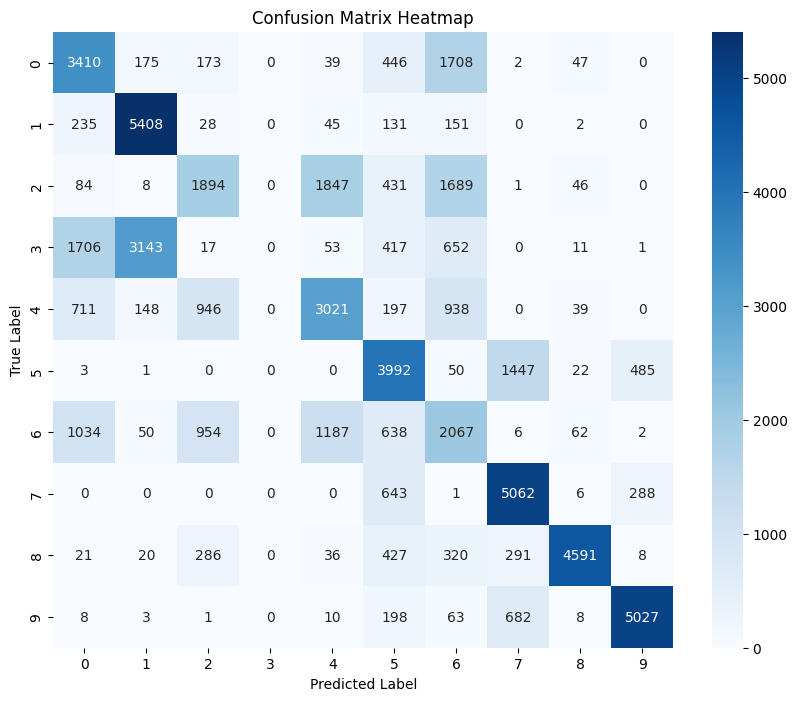

In [21]:
# Compute and display confusion matrix

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_train, mapped_labels)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()


In [22]:
#  Compute accuracy
accuracy = accuracy_score(y_train, mapped_labels)
print(f"Clustering Accuracy: {accuracy:.2f}")

Clustering Accuracy: 0.57


In [23]:
#  Function to visualize images from a cluster
def plot_cluster_images(cluster_id, n_images=5):
    cluster_indices = np.where(cluster_labels == cluster_id)[0]
    fig, axes = plt.subplots(1, n_images, figsize=(15, 15))
    for i in range(n_images):
        ax = axes[i]
        ax.imshow(x_train[cluster_indices[i]], cmap='gray')
        ax.axis('off')
    plt.show()

Cluster 0:


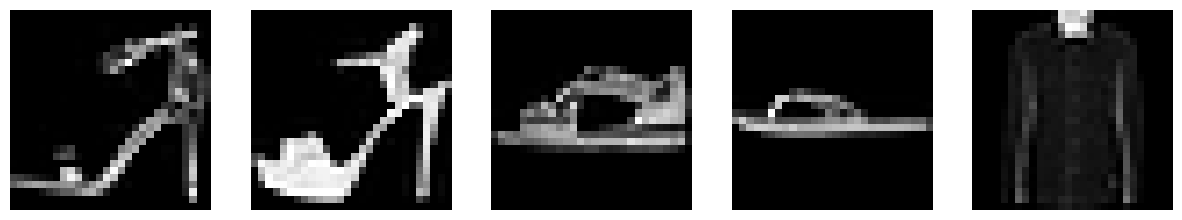

Cluster 1:


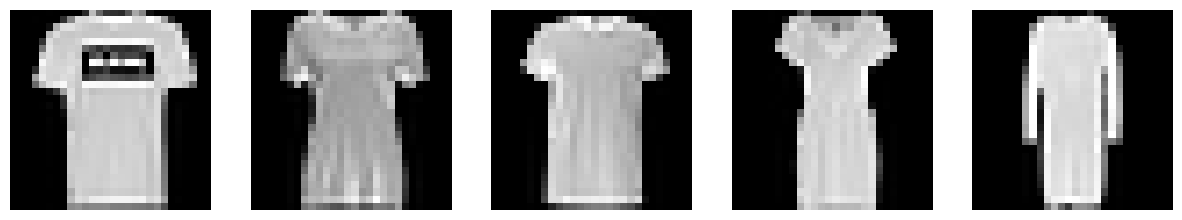

Cluster 2:


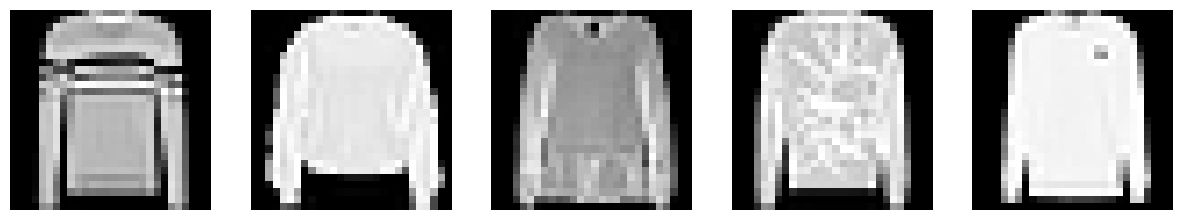

Cluster 3:


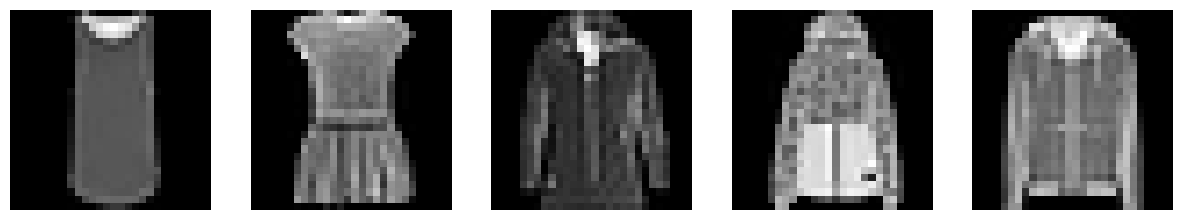

Cluster 4:


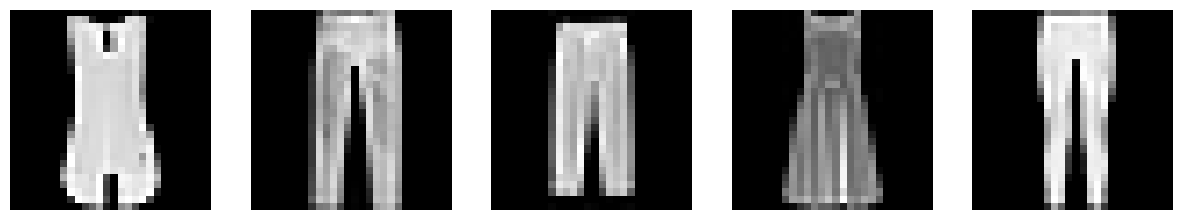

Cluster 5:


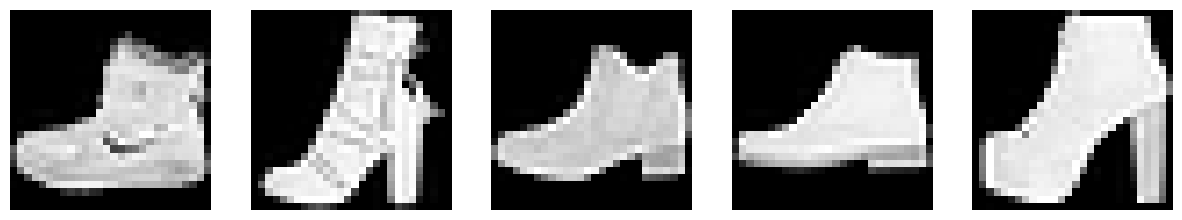

Cluster 6:


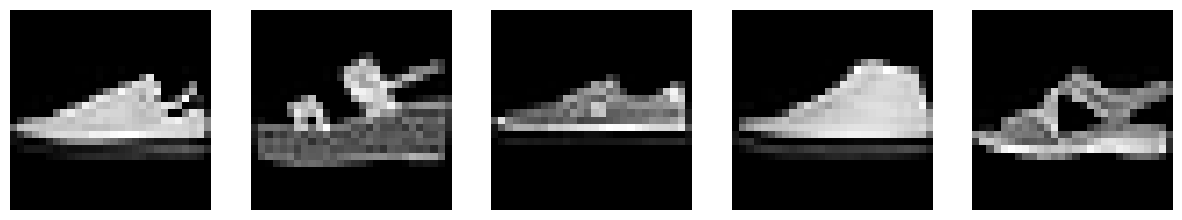

Cluster 7:


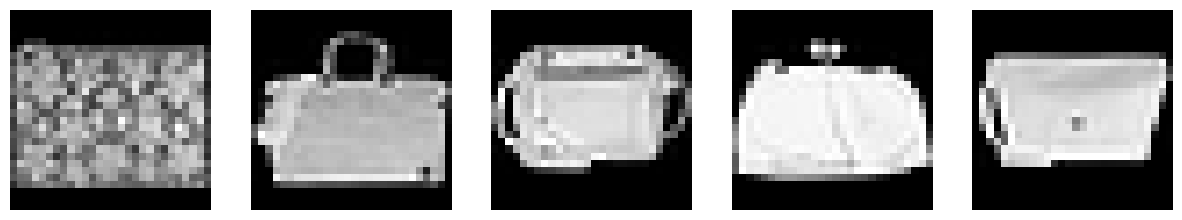

Cluster 8:


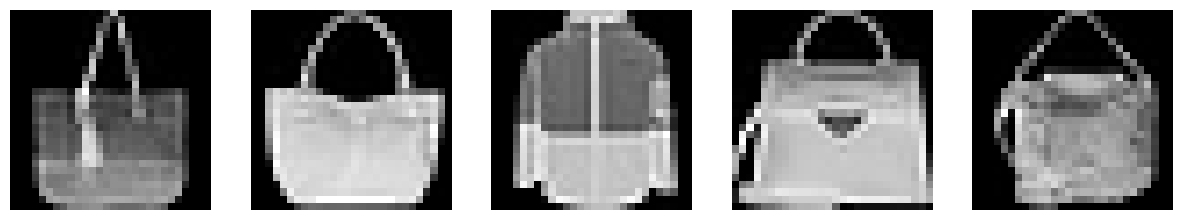

Cluster 9:


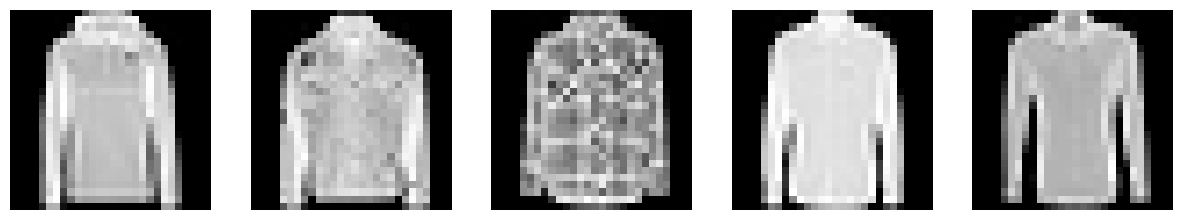

In [24]:
for cluster_id in range(10):
    print(f"Cluster {cluster_id}:")
    plot_cluster_images(cluster_id)

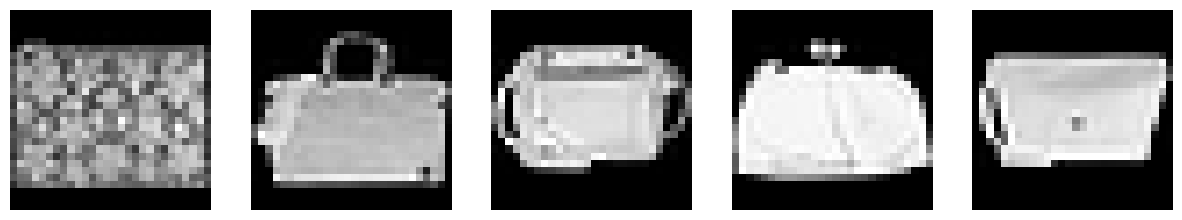

In [25]:
plot_cluster_images(cluster_id=7, n_images=5)